# Learn CSV handling in Python with ClimoMarineLab 
https://github.com/akashspunnayil/ClimoMarineLab

## Installing necessary packages for this notebook 
### uncomment to run the cells, if needed 

In [1]:
# !pip install netCDF4
# !pip install numpy
# !pip install matplotlib
# !pip install pandas

## Load packages 

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Create a sample dummy csv data plot
You can use your own data instead of this dummy data

**Make sure that all columns have equal length (same number of rows)**

In [3]:
# Define the dimensions of the grid
n_lat = 10  # Number of latitude points
n_lon = 20  # Number of longitude points

# Generate latitude and longitude grid
latitude = np.linspace(-90, 90, n_lat)
longitude = np.linspace(-180, 180, n_lon)

# Create a mesh grid of latitude and longitude
latitude_grid, longitude_grid = np.meshgrid(latitude, longitude)

# Generate synthetic variable data for the grid (replace with your own data generation logic)
variable_data = np.random.uniform(0, 30, size=(n_lon, n_lat))

# Create a DataFrame for the grid data
df = pd.DataFrame({
    'Latitude': latitude_grid.flatten(),
    'Longitude': longitude_grid.flatten(),
    'variable': variable_data.T.flatten()  # Transpose variable_data
})

# Save the synthetic grid data to a CSV file
df.to_csv('grid_data.csv', index=False)


In [4]:
print(df)

     Latitude  Longitude   variable
0       -90.0     -180.0   2.334080
1       -70.0     -180.0  17.104058
2       -50.0     -180.0  23.640498
3       -30.0     -180.0  28.410560
4       -10.0     -180.0   0.599480
..        ...        ...        ...
195      10.0      180.0  13.624682
196      30.0      180.0  28.455084
197      50.0      180.0  19.122736
198      70.0      180.0   3.636562
199      90.0      180.0  12.146726

[200 rows x 3 columns]


## Load table data 

In [5]:
# Load the synthetic data from the CSV file
table_data = pd.read_csv('grid_data.csv') # Or replace with your CSV data
print(table_data)

# table_data = pd.read_excel('grid_data.xlsx') # In case you have a excel format (eg: xlsx)

# Extract latitude, longitude, and temperature data
latitude = table_data['Latitude'].values
longitude = table_data['Longitude'].values
variable = table_data['variable'].values

print('shapes of latitude, longitude, variable', latitude.shape, longitude.shape, variable.shape)

# Define the dimensions of the grid
n_lat = 10
n_lon = 20

# Reshape the latitude, longitude, and variable arrays to match the grid dimensions
latitude_grid = latitude.reshape((n_lat, n_lon))
longitude_grid = longitude.reshape((n_lat, n_lon))
variable_grid = variable.reshape((n_lat, n_lon))

print('shapes of latitude_grid, longitude_grid, variable_grid', latitude_grid.shape, longitude_grid.shape, \
      variable_grid.shape)

     Latitude  Longitude   variable
0       -90.0     -180.0   2.334080
1       -70.0     -180.0  17.104058
2       -50.0     -180.0  23.640498
3       -30.0     -180.0  28.410560
4       -10.0     -180.0   0.599480
..        ...        ...        ...
195      10.0      180.0  13.624682
196      30.0      180.0  28.455084
197      50.0      180.0  19.122736
198      70.0      180.0   3.636562
199      90.0      180.0  12.146726

[200 rows x 3 columns]
shapes of latitude, longitude, variable (200,) (200,) (200,)
shapes of latitude_grid, longitude_grid, variable_grid (10, 20) (10, 20) (10, 20)


## Plot the contour fill plot

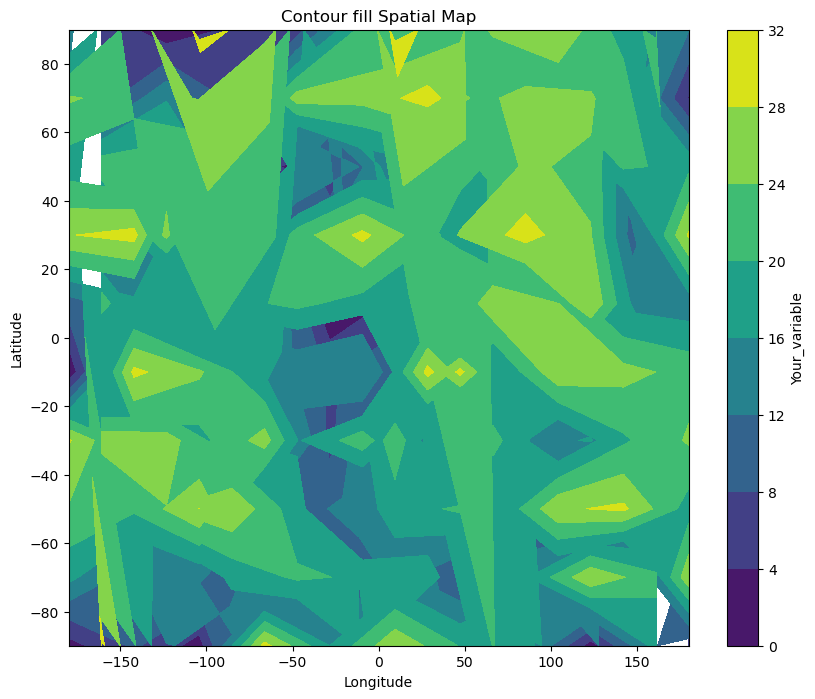

In [6]:

plt.figure(figsize=(10, 8))
plt.contourf(longitude_grid, latitude_grid, variable_grid, cmap='viridis')
plt.colorbar(label='Your_variable')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Contour fill Spatial Map')

# Save the plot as an image (e.g., in JPG format) with specified DPI and bbox_inches
plt.savefig('contour_fill_plot_cropped_and_highDPI.jpg', dpi=300, bbox_inches='tight')

plt.show()


## Plot the contour plot

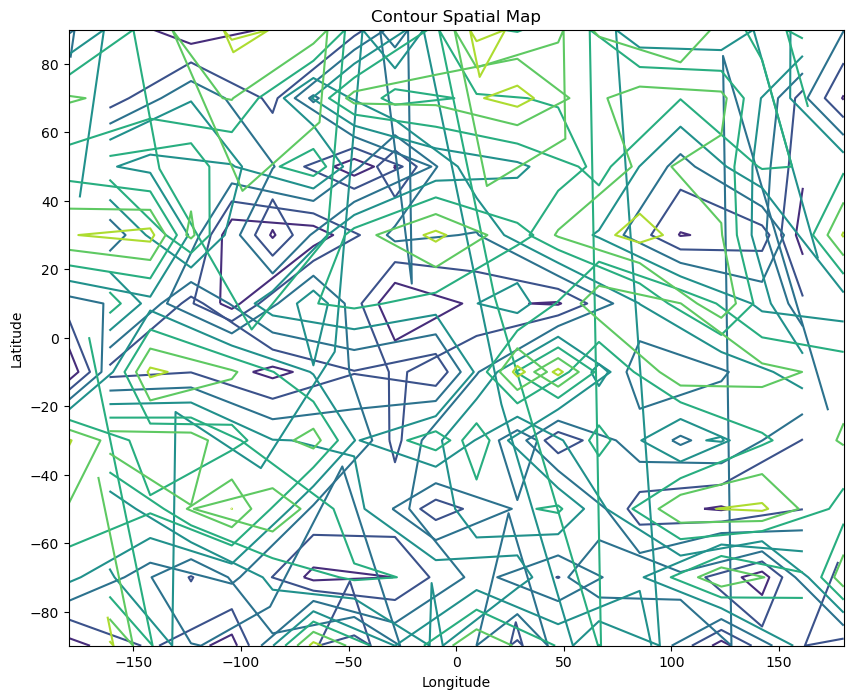

In [7]:

plt.figure(figsize=(10, 8))
plt.contour(longitude_grid, latitude_grid, variable_grid)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Contour Spatial Map')

# Save the plot as an image (e.g., in JPG format) with specified DPI and bbox_inches
plt.savefig('contour_plot_cropped_and_highDPI.jpg', dpi=300, bbox_inches='tight')

plt.show()


# Some more customisations

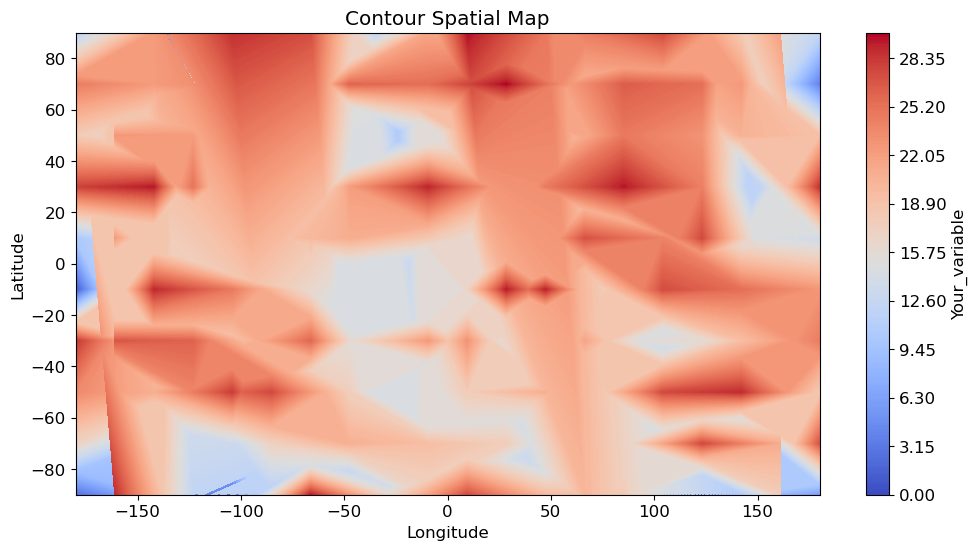

In [8]:

# Set font size
mpl.rcParams['font.size'] = 12

# Set font family (e.g., 'serif', 'sans-serif', 'monospace')
mpl.rcParams['font.family'] = 'sans-serif'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series data.
plt.contourf(longitude_grid, latitude_grid, variable_grid, cmap='coolwarm', levels=200) # increase levels to smooth plot 
plt.colorbar(label='Your_variable')
ax.set_title(f'Contour Spatial Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the plot as an image (e.g., in JPG format) with specified DPI and bbox_inches
plt.savefig('contour_plot_cropped_and_highDPI_feature.jpg', dpi=300, bbox_inches='tight')

plt.show()


# END OF CODE

Feel free to reach out to the author if you have any questions or need assistance: Akash (akashspunnayil@gmail.com)